<a href="https://colab.research.google.com/github/nishultomar/YOLO_Exersices/blob/master/YOLO_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from darkflow.net.build import TFNet

In [0]:
options = {"model": "/home/nishul/Downloads/darkflow/cfg/yolo.cfg", 
           "load": "/home/nishul/Downloads/darkflow/bin/yolo.weights", 
           "threshold": 0.1, 
           "gpu": 1.0}

In [41]:
 tfnet = TFNet(options)

Parsing /home/nishul/Downloads/darkflow/cfg/yolo.cfg
Loading /home/nishul/Downloads/darkflow/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.016855239868164062s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2       

Use local path of your image

In [50]:
import pprint as pp
import cv2
original_img = cv2.imread(r"/home/nishul/Downloads/yolo_testing1.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 307, 'y': 374},
  'confidence': 0.5819986,
  'label': 'person',
  'topleft': {'x': 168, 'y': 160}},
 {'bottomright': {'x': 295, 'y': 447},
  'confidence': 0.33562657,
  'label': 'bicycle',
  'topleft': {'x': 183, 'y': 269}},
 {'bottomright': {'x': 266, 'y': 439},
  'confidence': 0.39447665,
  'label': 'bicycle',
  'topleft': {'x': 206, 'y': 321}},
 {'bottomright': {'x': 806, 'y': 220},
  'confidence': 0.107535355,
  'label': 'car',
  'topleft': {'x': 715, 'y': 181}},
 {'bottomright': {'x': 97, 'y': 356},
  'confidence': 0.40959644,
  'label': 'truck',
  'topleft': {'x': 8, 'y': 120}},
 {'bottomright': {'x': 213, 'y': 318},
  'confidence': 0.16080908,
  'label': 'truck',
  'topleft': {'x': 111, 'y': 155}},
 {'bottomright': {'x': 290, 'y': 317},
  'confidence': 0.26027015,
  'label': 'car',
  'topleft': {'x': 135, 'y': 158}},
 {'bottomright': {'x': 92, 'y': 360},
  'confidence': 0.41106057,
  'label': 'car',
  'topleft': {'x': 5, 'y': 149}},
 {'bottomright': {'x': 

**Display before boxing**

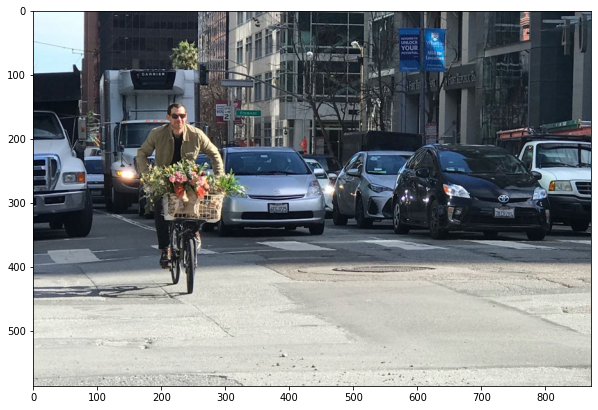

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

**Boxing function**

In [0]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

**Boxing results**

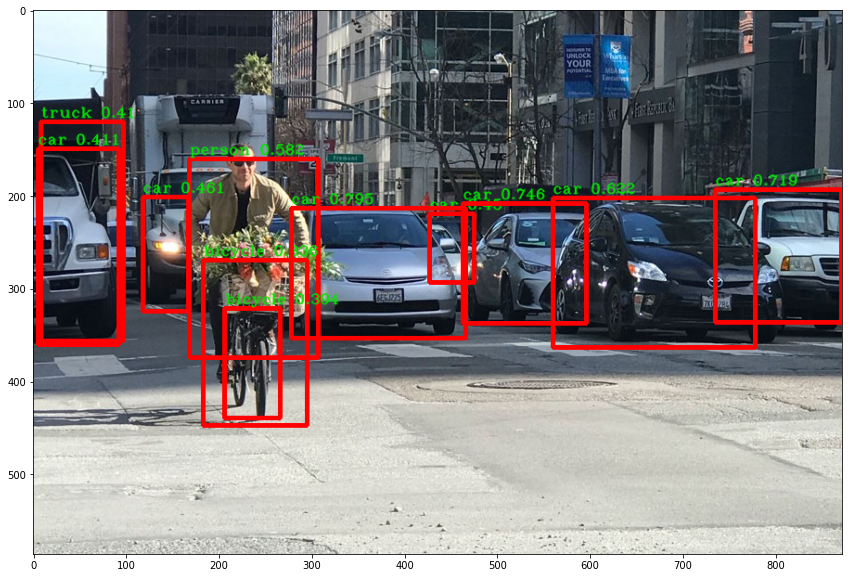

In [55]:
import numpy as np
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

**Boxing on video**

I have used the MP4 from my local, you can replace the path with your own.

In [0]:
cap = cv2.VideoCapture('/home/nishul/CarTraffic.mp4')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('/home/nishul/CarTraffic.avi',fourcc, 20.0, (int(width), int(height)))

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if ret == True:
        frame = np.asarray(frame)
        results = tfnet.return_predict(frame)

        new_frame = boxing(frame, results)

        # Display the resulting frame
        out.write(new_frame)
        cv2.imshow('frame',new_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# When everything done, release the capture
cap.release()
out.release()
cv2.destroyAllWindows()